# MATH 210 Introduction to Mathematical Computing

## March 7, 2022

* Trapezoid Rule
* Error Formula
* Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Trapezoid Rule

The trapezoid rule on $N$ subintervals is

$$
\int_a^b f(x) \, dx \approx \sum_{n=1}^N \left( \frac{f(x_n) + f(x_{n-1})}{2} \right) (x_n - x_{n-1})
$$

Note that the trapezoid rule is the average of the right and left Riemann sums.

Write a function called `trapz` which takes input parameters `f`, `a`, `b` and `N`, and returns the trapezoid rule approximation on $N$ subintervals of equal length.

In [2]:
def trapz(f,a,b,N):
    x = np.linspace(a,b,N+1)
    y = f(x)
    return (b-a)/N*np.sum(y[1:] + y[:-1])/2

## Example

Test our function using an example where we know the exact value:

$$
\int_0^1 \frac{1}{1 + x^2} dx = \left. \arctan(x) \right|_0^1 = \arctan(1) - \arctan(0) = \frac{\pi}{4}
$$

In [3]:
f = lambda x: 1/(1 + x**2)
a = 0; b = 1; N = 100;
I = trapz(f,a,b,N)
print(I)

0.7853939967307819


In [4]:
np.pi/4

0.7853981633974483

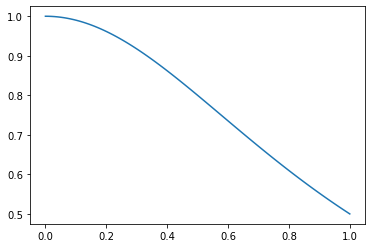

In [5]:
x = np.linspace(0,1,100)
y = 1/(1 + x**2)
plt.plot(x,y)
plt.show()

## Example

Is the trapezoid rule approximation for $\int_1^2 x^x dx$ an overestimate or underestimate?

It's an overestimate since $f(x) = x^x$ is concave up.

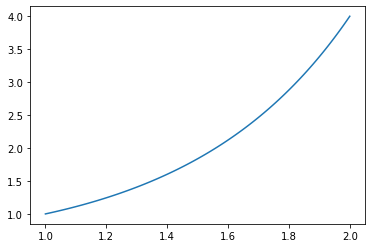

In [6]:
x = np.linspace(1,2,100)
y = x**x
plt.plot(x,y)
plt.show()

## Error Formula

Introduce notation for the trapezoid rule on $N$ subintervals of equal length

$$
T_N(f) = \frac{b - a}{2N} \sum_{n=1}^N (f(x_n) + f(x_{n-1}))
$$

The error bound for the trapezoid rule is

$$
E_N^T(f) = \left| \int_a^b f(x)dx - T_N(f) \right| \leq \frac{(b-a)^3}{12N^2}K_2
$$

where $|f''(x)| \leq K_2$ for all $x \in [a,b]$.

## Example

Find $N$ which guarantees the error for the trapezoid rule approximation of

$$
\int_e^{e^2} \ln(\ln(x)) \, dx
$$

is less than 0.001. Is $T_N(f)$ an overestimate or underestimate?

Compute

$$
f'(x) = \frac{1}{x \ln(x)}
$$

Now compute

$$
f''(x) = -\frac{\ln(x) + 1}{(x \ln(x))^2}
$$

Since both $x$ and $\ln(x)$ are increasing:

* $\ln(x) + 1 \leq 3$ for $x \in [e,e^2]$
* $1/(x \ln(x))^2 \leq 1/e^2$ for $x \in [e,e^2]$

Therefore

$$
| f''(x) | = \frac{\ln(x) + 1}{(x \ln(x))^2} \leq \frac{3}{e^2}
$$


In [7]:
a = np.exp(1); b = np.exp(2); E = 0.001; K2 = 3/np.exp(2)
N = np.sqrt((b-a)**3/12/E*K2)
N

58.71632169148998

In [8]:
f = lambda x:np.log(np.log(x))
a = np.exp(1); b = np.exp(2); N = 59;
I = trapz(f,a,b,N)
print(I)

2.0624300903751123


We could also plot the function to see the maximum value is at the left endpoint $x=e$.

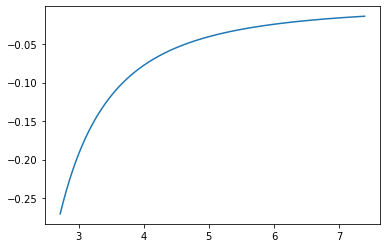

In [9]:
x = np.linspace(np.exp(1),np.exp(2),100)
y = -(np.log(x) + 1)/(x*np.log(x))**2
plt.plot(x,y)
plt.show()

In [10]:
3/np.exp(2)

0.40600584970983805

In [11]:
2/np.exp(2)

0.2706705664732254